In [45]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [129]:
# Load libraries
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [130]:
##Load the dataset

filename = 'diabetes.csv'
dataset = read_csv(filename)
array = dataset.values
X = array[:,0:8]
y = array[:,8]

In [131]:
dataset.shape

(768, 9)

In [132]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [133]:
dataset.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [134]:
# coded added by nikita 
dataset.describe()

#
#Inference by this

#Minimum values for many variables are 0.
#As biological parameters like Glucose, BP, Skin thickness,Insulin & BMI cannot have zero values, looks like null values have been coded as zeros
#As a next step, find out how many Zero values are included in each variable """

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

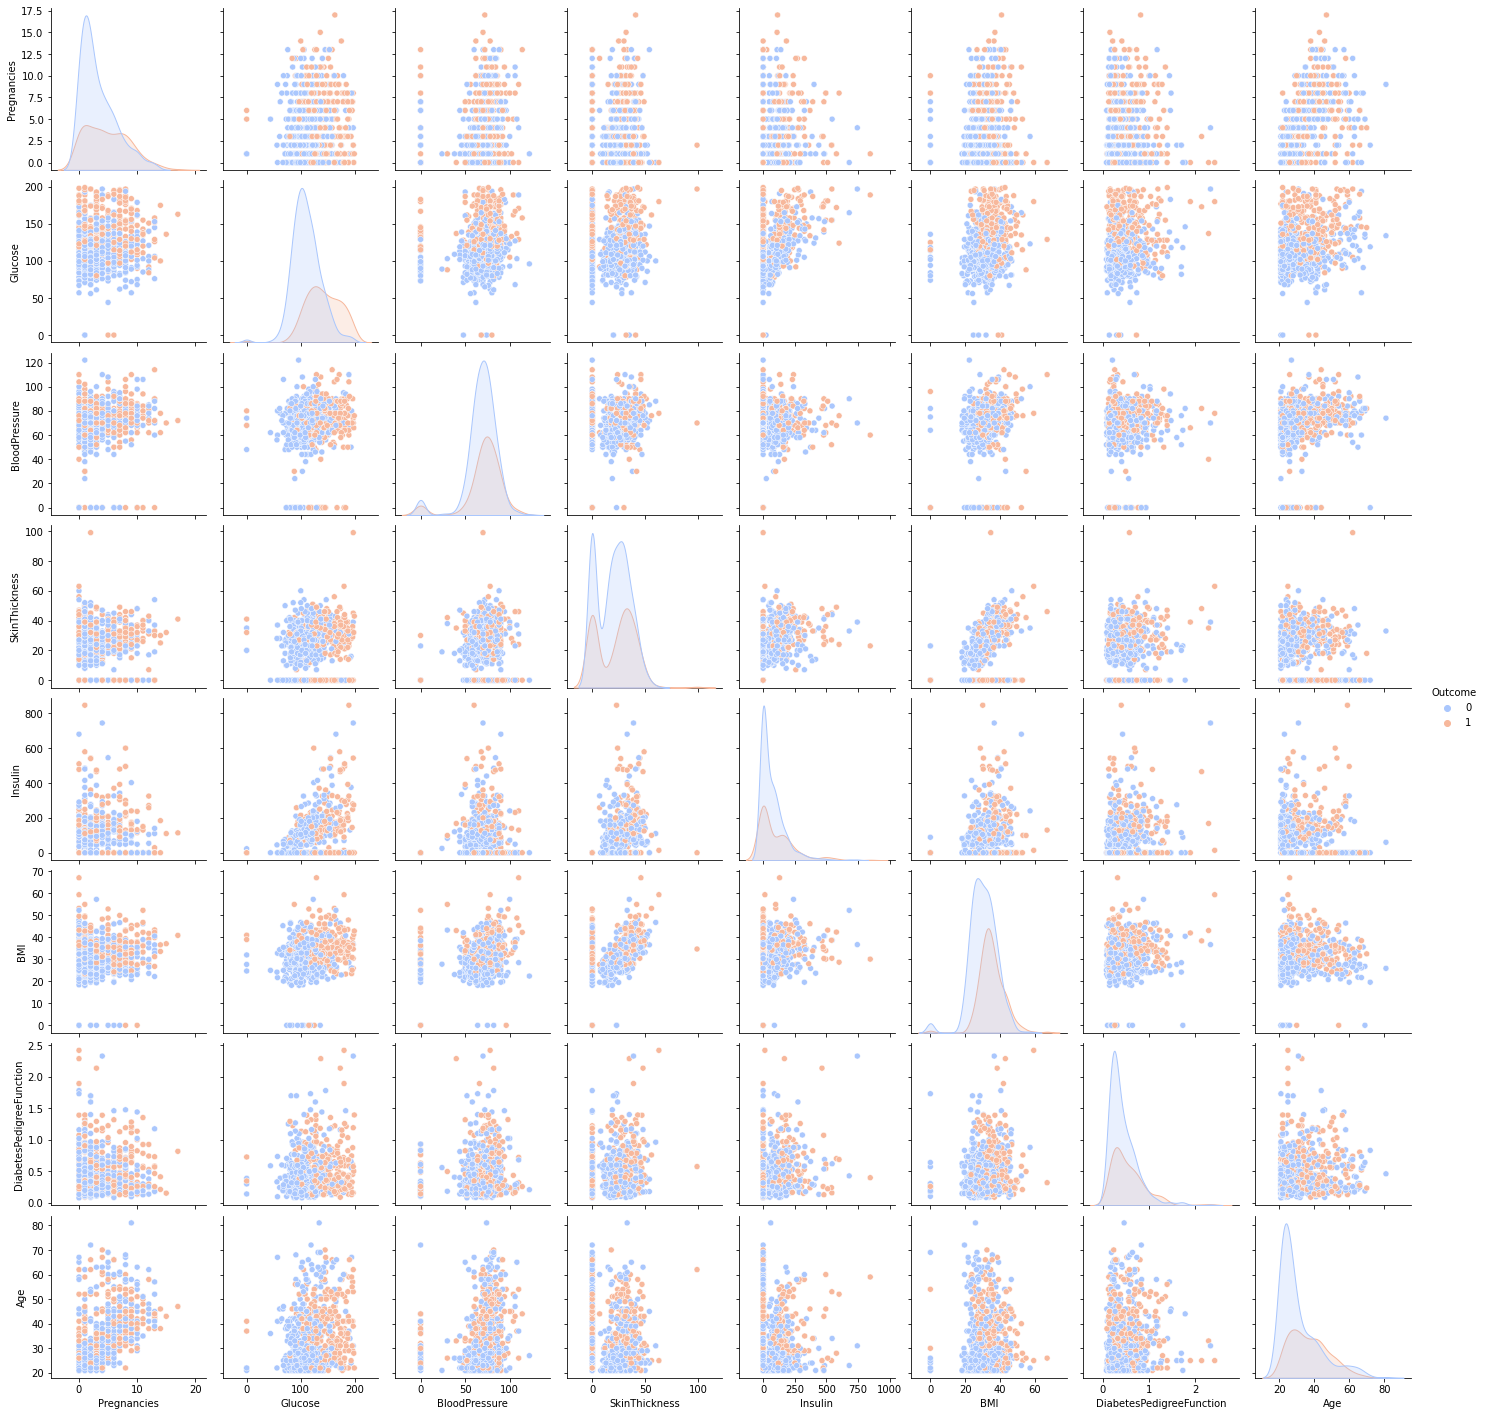

In [135]:
#changes added by nikita
# below pairplot is giving  pairwise relationships across an entire dataframe also its seperating diabetic and nondiabetic data with different colors 
# diabetic =1 is represented by blue
# nondiabetic =0 is represented by orange
sns.pairplot(dataset,hue='Outcome',palette='coolwarm')

'\nInference:\nThere are 66% 0’s (nondiabetic) and 34% 1’s (diabetic) in the data\n'

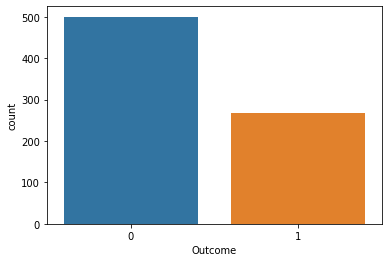

In [136]:
# changes added by Nikita, below plot shows count of diabetic and non diabetic patients in data
sns.countplot(x='Outcome',data=dataset)

"""
Inference:
There are 66% 0’s (nondiabetic) and 34% 1’s (diabetic) in the data
"""

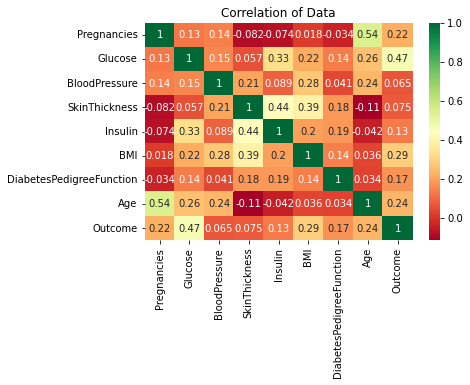

In [137]:
data_corr = dataset.corr()
# sns.heatmap(data_corr, vmax=1, square=True)
sns.heatmap(data_corr, annot=True, cmap='RdYlGn')
pyplot.title("Correlation of Data")
pyplot.show()

In [138]:
#changes added by nikita starts # data
# data has some missing values so filling them with either mean or median values
diabetes_data_Modified = dataset.copy(deep=True)
diabetes_data_Modified[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data_Modified[
    ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

diabetes_data_Modified['Glucose'].fillna(diabetes_data_Modified['Glucose'].mean(), inplace=True)
diabetes_data_Modified['BloodPressure'].fillna(diabetes_data_Modified['BloodPressure'].mean(), inplace=True)
diabetes_data_Modified['SkinThickness'].fillna(diabetes_data_Modified['SkinThickness'].median(), inplace=True)
diabetes_data_Modified['Insulin'].fillna(diabetes_data_Modified['Insulin'].median(), inplace=True)
diabetes_data_Modified['BMI'].fillna(diabetes_data_Modified['BMI'].median(), inplace=True)
dataset = diabetes_data_Modified
#changes added by nikita ends

In [139]:
#feature engineering code added by nikita
#Underweight: BMI is less than 18.5
#Healthy weight: BMI is between 18.5 and 24.9
#Overweight: BMI is between 25 and 29.9
#Obesity: BMI is 30 or more
#dataset['BMI_cat'] = 'missing'
dataset.loc[dataset['BMI'] < 18.5, 'BMI_cat'] = 'underweight'
dataset.loc[(dataset['BMI'] >= 18.5) & (dataset['BMI'] < 25), 'BMI_cat'] = 'healthy weight'
dataset.loc[(dataset['BMI'] >= 25) & (dataset['BMI'] < 30), 'BMI_cat'] = 'overweight'
dataset.loc[dataset['BMI'] >= 30, 'BMI_cat'] = 'obesity'
dataset['BMI_cat'].value_counts(normalize=True)
dataset.groupby(['BMI_cat','Outcome']).describe()







Pregnancies                                           \
                             count      mean       std  min   25%  50%  75%   
BMI_cat        Outcome                                                        
healthy weight 0              95.0  3.094737  2.968178  0.0  1.00  2.0  4.0   
               1               7.0  5.285714  2.811541  1.0  3.50  6.0  7.0   
obesity        0             262.0  3.442748  3.207177  0.0  1.00  2.0  5.0   
               1             221.0  4.696833  3.816643  0.0  1.00  4.0  8.0   
overweight     0             139.0  3.237410  2.682695  0.0  1.00  2.0  5.0   
               1              40.0  5.725000  3.389180  0.0  3.00  6.0  8.0   
underweight    0               4.0  0.750000  0.500000  0.0  0.75  1.0  1.0   

                             Glucose              ...  \
                         max   count        mean  ...   
BMI_cat        Outcome                            ...   
healthy weight 0        13.0    95.0  105.607229  ...   
               1         9.0     7.0  157.571429  ...   
obesity        0        13.0   262.0  111.640026  ...   
               1        17.0   221.0  143.626125  ...   
overweight     0        12.0   139.0  112.889833  ...   
               1        13.0    40.0  131.400000  ...   
underweight    0         1.0     4.0   95.250000  ...   

                       DiabetesPedigreeFunction           Age             \
                                            75%    max  count       mean   
BMI_cat        Outcome                                                     
healthy weight 0                        0.50850  1.698   95.0  30.978947   
               1                        0.55950  0.678    7.0  44.285714   
obesity        0                        0.55850  2.329  262.0  31.270992   
               1                        0.74300  2.420  221.0  36.656109   
overweight     0                        0.57200  1.699  139.0  31.388489   
               1                        0.69575  1.318   40.0  38.075000   
underweight    0                        0.59250  0.624    4.0  24.000000   

                                                                  
                              std   min    25%   50%   75%   max  
BMI_cat        Outcome                                            
healthy weight 0        12.781285  21.0  22.00  26.0  34.5  72.0  
               1        14.738999  23.0  32.50  50.0  56.0  60.0  
obesity        0        10.456580  21.0  24.00  27.0  38.0  69.0  
               1        10.966035  21.0  27.00  36.0  43.0  70.0  
overweight     0        13.127861  21.0  22.00  27.0  36.0  81.0  
               1        10.024042  22.0  29.75  36.0  46.0  62.0  
underweight    0         3.464102  21.0  21.00  24.0  27.0  27.0  

[7 rows x 64 columns]

In [140]:
dataset.shape

(768, 10)

In [141]:
#Code added by Nikita

#dataset['BloodPressure_cat'] = 'missing'
dataset.loc[dataset['BloodPressure'] < 80, 'BloodPressure_cat'] = 'normal'
dataset.loc[(dataset['BloodPressure'] >= 80) & (dataset['BloodPressure'] < 90), 'BloodPressure_cat'] = 'high blood pressure - stg1'
dataset.loc[(dataset['BloodPressure'] >= 90) & (dataset['BloodPressure'] < 120), 'BloodPressure_cat'] = 'high blood pressure - stg2'
dataset.loc[dataset['BloodPressure'] >= 120, 'BloodPressure_cat'] = 'hipertensive crisis'
dataset['BloodPressure_cat'].value_counts(normalize=True)
dataset.groupby(['BloodPressure_cat','Outcome']).describe()

Pregnancies                                 \
                                         count      mean       std  min   25%   
BloodPressure_cat          Outcome                                              
high blood pressure - stg1 0              84.0  3.690476  3.617149  0.0  1.00   
                           1              61.0  5.196721  3.581525  0.0  2.00   
high blood pressure - stg2 0              30.0  4.333333  3.122039  0.0  2.00   
                           1              29.0  5.379310  4.279634  0.0  1.00   
hipertensive crisis        0               1.0  1.000000       NaN  1.0  1.00   
normal                     0             385.0  3.137662  2.847561  0.0  1.00   
                           1             178.0  4.668539  3.707866  0.0  1.25   

                                                   Glucose              ...  \
                                    50%  75%   max   count        mean  ...   
BloodPressure_cat          Outcome                                      ...   
high blood pressure - stg1 0        3.0  6.0  13.0    84.0  119.071429  ...   
                           1        5.0  9.0  12.0    61.0  137.109619  ...   
high blood pressure - stg2 0        4.0  6.0  11.0    30.0  121.933333  ...   
                           1        5.0  8.0  13.0    29.0  151.103448  ...   
hipertensive crisis        0        1.0  1.0   1.0     1.0   96.000000  ...   
normal                     0        2.0  5.0  13.0   385.0  108.049507  ...   
                           1        4.0  7.0  17.0   178.0  142.442060  ...   

                                   DiabetesPedigreeFunction           Age  \
                                                        75%    max  count   
BloodPressure_cat          Outcome                                          
high blood pressure - stg1 0                        0.60250  1.781   84.0   
                           1                        0.82500  2.137   61.0   
high blood pressure - stg2 0                        0.56025  1.461   30.0   
                           1                        0.58300  1.321   29.0   
hipertensive crisis        0                        0.20700  0.207    1.0   
normal                     0                        0.55700  2.329  385.0   
                           1                        0.69200  2.420  178.0   

                                                                            \
                                         mean        std   min   25%   50%   
BloodPressure_cat          Outcome                                           
high blood pressure - stg1 0        34.761905  13.641378  21.0  24.0  29.0   
                           1        39.377049  11.650699  21.0  29.0  40.0   
high blood pressure - stg2 0        37.866667  12.765074  21.0  28.0  36.5   
                           1        42.206897  12.178375  21.0  33.0  43.0   
hipertensive crisis        0        27.000000        NaN  27.0  27.0  27.0   
normal                     0        29.901299  10.788479  21.0  22.0  26.0   
                           1        35.438202  10.156910  21.0  28.0  33.0   

                                                 
                                      75%   max  
BloodPressure_cat          Outcome               
high blood pressure - stg1 0        41.25  69.0  
                           1        49.00  70.0  
high blood pressure - stg2 0        46.75  65.0  
                           1        51.00  66.0  
hipertensive crisis        0        27.00  27.0  
normal                     0        33.00  81.0  
                           1        42.00  67.0  

[7 rows x 64 columns]

In [102]:
dataset.shape

(768, 11)

In [142]:
#Code added by Nikita
#dataset['Glucose_cat'] = 'missing'
dataset.loc[dataset['Glucose'] < 140, 'Glucose_cat'] = 'normal'
dataset.loc[(dataset['Glucose'] >= 140) & (dataset['Glucose'] < 200), 'Glucose_cat'] = 'prediabetes'
dataset.loc[dataset['Glucose'] >= 200, 'Glucose_cat'] = 'diabetes'
dataset['Glucose_cat'].value_counts(normalize=True)
dataset.groupby(['Glucose_cat','Outcome']).describe()

Pregnancies                                                \
                          count      mean       std  min  25%  50%  75%   max   
Glucose_cat Outcome                                                             
normal      0             438.0  3.205479  2.968757  0.0  1.0  2.0  5.0  13.0   
            1             133.0  4.834586  3.824127  0.0  1.0  4.0  8.0  15.0   
prediabetes 0              62.0  3.951613  3.291456  0.0  1.0  4.0  6.0  13.0   
            1             135.0  4.896296  3.671744  0.0  2.0  4.0  8.0  17.0   

                    Glucose              ... DiabetesPedigreeFunction         \
                      count        mean  ...                      75%    max   
Glucose_cat Outcome                      ...                                   
normal      0         438.0  104.226165  ...                  0.55000  1.731   
            1         133.0  116.965214  ...                  0.73200  2.288   
prediabetes 0          62.0  156.516129  ...                  0.67375  2.329   
            1         135.0  166.992593  ...                  0.72000  2.420   

                       Age                                                 \
                     count       mean        std   min   25%   50%    75%   
Glucose_cat Outcome                                                         
normal      0        438.0  30.394977  11.076050  21.0  22.0  26.0  34.00   
            1        133.0  35.360902   9.625045  21.0  27.0  33.0  43.00   
prediabetes 0         62.0  36.806452  14.076883  21.0  24.0  34.0  44.75   
            1        135.0  38.748148  11.946222  21.0  29.0  37.0  47.00   

                           
                      max  
Glucose_cat Outcome        
normal      0        81.0  
            1        62.0  
prediabetes 0        67.0  
            1        70.0  

[4 rows x 64 columns]

In [104]:
dataset.shape

(768, 12)

In [143]:
#Code added by Nikita
dataset.loc[dataset['Age'] < 31, 'Age_cat'] = 'young adults'
dataset.loc[(dataset['Age'] >= 31) & (dataset['Age'] < 45), 'Age_cat'] = 'middle aged adults'
dataset.loc[dataset['Age'] >= 45, 'Age_cat'] = 'old adults'
dataset['Age_cat'].value_counts(normalize=True)
dataset.groupby(['Age_cat','Outcome']).describe()

Pregnancies                                     \
                                 count      mean       std  min  25%  50%   
Age_cat            Outcome                                                  
middle aged adults 0             106.0  5.566038  3.162334  0.0  4.0  5.0   
                   1             112.0  5.928571  3.702238  0.0  3.0  7.0   
old adults         0              67.0  6.313433  3.542850  0.0  5.0  6.0   
                   1              66.0  6.651515  3.575525  0.0  4.0  7.0   
young adults       0             327.0  1.944954  1.671678  0.0  1.0  2.0   
                   1              90.0  2.233333  2.182927  0.0  0.0  2.0   

                                       Glucose              ...  \
                             75%   max   count        mean  ...   
Age_cat            Outcome                                  ...   
middle aged adults 0        7.75  13.0   106.0  111.037736  ...   
                   1        8.00  15.0   112.0  141.244406  ...   
old adults         0        8.50  13.0    67.0  122.955224  ...   
                   1        9.00  17.0    66.0  146.242424  ...   
young adults       0        3.00  10.0   327.0  108.094986  ...   
                   1        3.00  10.0    90.0  140.322222  ...   

                           DiabetesPedigreeFunction           Age             \
                                                75%    max  count       mean   
Age_cat            Outcome                                                     
middle aged adults 0                        0.67825  2.329  106.0  36.943396   
                   1                        0.73125  2.288  112.0  37.241071   
old adults         0                        0.58450  1.476   67.0  55.701493   
                   1                        0.73075  1.390   66.0  52.303030   
young adults       0                        0.53400  1.731  327.0  24.302752   
                   1                        0.69975  2.420   90.0  25.677778   

                                                                      
                                 std   min    25%   50%    75%   max  
Age_cat            Outcome                                            
middle aged adults 0        3.831772  31.0  34.00  37.0  40.00  44.0  
                   1        4.257998  31.0  33.00  37.0  41.00  44.0  
old adults         0        8.400965  45.0  48.00  55.0  62.50  81.0  
                   1        6.136824  45.0  47.00  51.5  55.75  70.0  
young adults       0        2.745340  21.0  22.00  24.0  26.00  30.0  
                   1        2.726597  21.0  23.25  25.5  28.00  30.0  

[6 rows x 64 columns]

In [106]:
dataset.shape

(768, 13)

In [144]:
dataset['Had pregnancy'] = dataset['Pregnancies'] > 0

In [145]:
dataset.groupby(['Had pregnancy','Outcome']).describe()

Pregnancies                                          \
                            count      mean       std  min  25%  50%  75%   
Had pregnancy Outcome                                                       
False         0              73.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
              1              38.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
True          0             427.0  3.861827  2.912192  1.0  2.0  3.0  6.0   
              1             230.0  5.669565  3.426640  1.0  3.0  5.0  8.0   

                            Glucose              ... DiabetesPedigreeFunction  \
                        max   count        mean  ...                      75%   
Had pregnancy Outcome                            ...                            
False         0         0.0    73.0  111.945205  ...                   0.5970   
              1         0.0    38.0  144.236842  ...                   0.7535   
True          0        13.0   427.0  110.498970  ...                   0.5590   
              1        17.0   230.0  141.823363  ...                   0.7205   

                                Age                                           \
                         max  count       mean        std   min    25%   50%   
Had pregnancy Outcome                                                          
False         0        1.781   73.0  27.095890  10.276949  21.0  22.00  23.0   
              1        2.420   38.0  28.578947   8.487293  21.0  24.00  25.5   
True          0        2.329  427.0  31.889930  11.757909  21.0  23.00  28.0   
              1        2.137  230.0  38.469565  10.709602  21.0  29.25  38.0   

                                   
                        75%   max  
Had pregnancy Outcome              
False         0        27.0  67.0  
              1        31.0  62.0  
True          0        37.0  81.0  
              1        45.0  70.0  

[4 rows x 64 columns]

In [109]:
dataset.shape

(768, 14)

In [146]:
cat_vars = ['BMI_cat', 'BloodPressure_cat', 'Glucose_cat', 'Age_cat','Had pregnancy']
for c in cat_vars:
    print(f'{c} - {dataset[c].nunique()}')

BMI_cat - 4
BloodPressure_cat - 4
Glucose_cat - 2
Age_cat - 3
Had pregnancy - 2


In [147]:
#categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop='first')
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
data = categorical_transformer.fit_transform(dataset[cat_vars]).toarray()
cols = categorical_transformer.get_feature_names_out()
X_train_cat = pd.DataFrame(data, columns=cols)
X_train_cat


BMI_cat_healthy weight  BMI_cat_obesity  BMI_cat_overweight  \
0                       0.0              1.0                 0.0   
1                       0.0              0.0                 1.0   
2                       1.0              0.0                 0.0   
3                       0.0              0.0                 1.0   
4                       0.0              1.0                 0.0   
..                      ...              ...                 ...   
763                     0.0              1.0                 0.0   
764                     0.0              1.0                 0.0   
765                     0.0              0.0                 1.0   
766                     0.0              1.0                 0.0   
767                     0.0              1.0                 0.0   

     BMI_cat_underweight  BloodPressure_cat_high blood pressure - stg1  \
0                    0.0                                           0.0   
1                    0.0                                           0.0   
2                    0.0                                           0.0   
3                    0.0                                           0.0   
4                    0.0                                           0.0   
..                   ...                                           ...   
763                  0.0                                           0.0   
764                  0.0                                           0.0   
765                  0.0                                           0.0   
766                  0.0                                           0.0   
767                  0.0                                           0.0   

     BloodPressure_cat_high blood pressure - stg2  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
..                                            ...   
763                                           0.0   
764                                           0.0   
765                                           0.0   
766                                           0.0   
767                                           0.0   

     BloodPressure_cat_hipertensive crisis  BloodPressure_cat_normal  \
0                                      0.0                       1.0   
1                                      0.0                       1.0   
2                                      0.0                       1.0   
3                                      0.0                       1.0   
4                                      0.0                       1.0   
..                                     ...                       ...   
763                                    0.0                       1.0   
764                                    0.0                       1.0   
765                                    0.0                       1.0   
766                                    0.0                       1.0   
767                                    0.0                       1.0   

     Glucose_cat_normal  Glucose_cat_prediabetes  Age_cat_middle aged adults  \
0                   0.0                      1.0                         0.0   
1                   1.0                      0.0                         1.0   
2                   0.0                      1.0                         1.0   
3                   1.0                      0.0                         0.0   
4                   1.0                      0.0                         1.0   
..                  ...                      ...                         ...   
763                 1.0                      0.0                         0.0   
764                 1.0                      0.0                         0.0   
765                 1.0                      0.0                         0.0 

In [148]:
X_train_cat['Outcome']=dataset['Outcome']

In [71]:
X_train_cat.head

<bound method NDFrame.head of      BMI_cat_healthy weight  BMI_cat_obesity  BMI_cat_overweight  \
0                       0.0              1.0                 0.0   
1                       0.0              0.0                 1.0   
2                       1.0              0.0                 0.0   
3                       0.0              0.0                 1.0   
4                       0.0              1.0                 0.0   
..                      ...              ...                 ...   
763                     0.0              1.0                 0.0   
764                     0.0              1.0                 0.0   
765                     0.0              0.0                 1.0   
766                     0.0              1.0                 0.0   
767                     0.0              1.0                 0.0   

     BMI_cat_underweight  BloodPressure_cat_high blood pressure - stg1  \
0                    0.0                                           0.0   
1    

In [149]:
dataset = dataset.drop(
    columns=['BloodPressure','Insulin','SkinThickness','BMI_cat','BloodPressure_cat','Glucose_cat','Age_cat','Had pregnancy','Outcome'])

In [150]:
dataset = pd.concat([dataset, X_train_cat], axis=1)
dataset

Pregnancies  Glucose   BMI  DiabetesPedigreeFunction  Age  \
0              6    148.0  33.6                     0.627   50   
1              1     85.0  26.6                     0.351   31   
2              8    183.0  23.3                     0.672   32   
3              1     89.0  28.1                     0.167   21   
4              0    137.0  43.1                     2.288   33   
..           ...      ...   ...                       ...  ...   
763           10    101.0  32.9                     0.171   63   
764            2    122.0  36.8                     0.340   27   
765            5    121.0  26.2                     0.245   30   
766            1    126.0  30.1                     0.349   47   
767            1     93.0  30.4                     0.315   23   

     BMI_cat_healthy weight  BMI_cat_obesity  BMI_cat_overweight  \
0                       0.0              1.0                 0.0   
1                       0.0              0.0                 1.0   
2                       1.0              0.0                 0.0   
3                       0.0              0.0                 1.0   
4                       0.0              1.0                 0.0   
..                      ...              ...                 ...   
763                     0.0              1.0                 0.0   
764                     0.0              1.0                 0.0   
765                     0.0              0.0                 1.0   
766                     0.0              1.0                 0.0   
767                     0.0              1.0                 0.0   

     BMI_cat_underweight  BloodPressure_cat_high blood pressure - stg1  ...  \
0                    0.0                                           0.0  ...   
1                    0.0                                           0.0  ...   
2                    0.0                                           0.0  ...   
3                    0.0                                           0.0  ...   
4                    0.0                                           0.0  ...   
..                   ...                                           ...  ...   
763                  0.0                                           0.0  ...   
764                  0.0                                           0.0  ...   
765                  0.0                                           0.0  ...   
766                  0.0                                           0.0  ...   
767                  0.0                                           0.0  ...   

     BloodPressure_cat_hipertensive crisis  BloodPressure_cat_normal  \
0                                      0.0                       1.0   
1                                      0.0                       1.0   
2                                      0.0                       1.0   
3                                      0.0                       1.0   
4                                      0.0                       1.0   
..                                     ...                       ...   
763                                    0.0                       1.0   
764                                    0.0                       1.0   
765                                    0.0                       1.0   
766                                    0.0                       1.0   
767                                    0.0                       1.0   

     Glucose_cat_normal  Glucose_cat_prediabetes  Age_cat_middle aged adults  \
0                   0.0                      1.0                         0.0   
1                   1.0                      0.0                         1.0   
2                   0.0                      1.0                         1.0   
3                   1.0                      0.0                         0.0   
4                   1.0                      0.0                         1.0   
..                  ...                      ...                         ...   
763                 1

In [151]:
dataset.shape

(768, 21)

In [152]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'BMI_cat_healthy weight', 'BMI_cat_obesity', 'BMI_cat_overweight',
       'BMI_cat_underweight', 'BloodPressure_cat_high blood pressure - stg1',
       'BloodPressure_cat_high blood pressure - stg2',
       'BloodPressure_cat_hipertensive crisis', 'BloodPressure_cat_normal',
       'Glucose_cat_normal', 'Glucose_cat_prediabetes',
       'Age_cat_middle aged adults', 'Age_cat_old adults',
       'Age_cat_young adults', 'Had pregnancy_False', 'Had pregnancy_True',
       'Outcome'],
      dtype='object')

In [158]:
data_corr = dataset.corr()
# sns.heatmap(data_corr, vmax=1, square=True)



pyplot.figure(figsize=(15, 15),dpi=600)
g=sns.heatmap(data_corr, square=True,
            center=0, annot=True, linewidths=.5,
            cmap="RdBu_r", cbar_kws={"shrink": 0.8},vmin=-1,vmax=1);
g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=8,ha='right')
pyplot.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

In [159]:
dataset = dataset.drop(
    columns=['BMI_cat_healthy weight','BMI_cat_overweight',
       'BMI_cat_underweight','BloodPressure_cat_high blood pressure - stg1',
       'BloodPressure_cat_high blood pressure - stg2',
       'BloodPressure_cat_hipertensive crisis', 'BloodPressure_cat_normal', 'Glucose_cat_normal', 'Age_cat_young adults', 'Had pregnancy_False', 'Had pregnancy_True'])

In [182]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'BMI_cat_obesity', 'Glucose_cat_prediabetes',
       'Age_cat_middle aged adults', 'Age_cat_old adults', 'Outcome'],
      dtype='object')

In [160]:
data_corr = dataset.corr()
# sns.heatmap(data_corr, vmax=1, square=True)



pyplot.figure(figsize=(15, 15),dpi=600)
g=sns.heatmap(data_corr, square=True,
            center=0, annot=True, linewidths=.5,
            cmap="RdBu_r", cbar_kws={"shrink": 0.8},vmin=-1,vmax=1);
g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=8,ha='right')
pyplot.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

In [164]:
# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:9]
y = array[:,9]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [165]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'


In [166]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('AdaBT', AdaBoostClassifier()))
##Changes Done By Nikita starts ###
models.append(('DT',DecisionTreeClassifier(random_state=0)))
models.append(('SVM_L',SVC(kernel="linear")))
models.append(('SVM_S', SVC(gamma='scale')))
models.append(('XGB', xgb.XGBClassifier(objective="binary:logistic", random_state=seed)))
##Changes Done By Nikita ends ###
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.765680 (0.044985)
LDA: 0.765732 (0.048088)
KNN: 0.746113 (0.047899)
CART: 0.663221 (0.063092)
NB: 0.739662 (0.048063)
SVM: 0.643601 (0.052315)
AdaBT: 0.742861 (0.047061)
DT: 0.666473 (0.062465)
SVM_L: 0.762480 (0.046319)
SVM_S: 0.759201 (0.042785)
XGB: 0.741407 (0.057544)


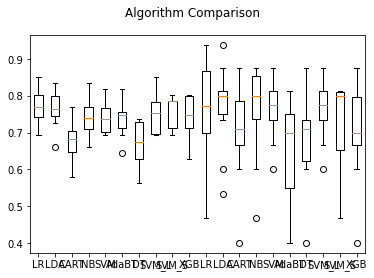

In [183]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [184]:
# Standardize the dataset
pipelines = []
pipelines.append(('S_LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('S_LDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('S_KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('S_CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('S_NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('S_SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
pipelines.append(('S_AdaBT', Pipeline([('Scaler', StandardScaler()),('AdaBT', AdaBoostClassifier())])))
#code added by Nikita Starts
pipelines.append(('S_DT', Pipeline([('Scaler', StandardScaler()),('DT',DecisionTreeClassifier(random_state=0))])))
pipelines.append(('S_SVM_L', Pipeline([('Scaler', StandardScaler()),('SVM_L',SVC(kernel="linear"))])))
pipelines.append(('S_SVM_S', Pipeline([('Scaler', StandardScaler()),('SVM_S', SVC(gamma='scale'))])))
pipelines.append(('S_XGB_S', Pipeline([('Scaler', StandardScaler()),('XGB', xgb.XGBClassifier(objective="binary:logistic", random_state=seed))])))
#Code added by Nikita ends
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


S_LR: 0.772263 (0.053670)
S_LDA: 0.765732 (0.048088)
S_KNN: 0.723533 (0.068792)
S_CART: 0.677869 (0.066381)
S_NB: 0.739662 (0.048063)
S_SVM: 0.760894 (0.041846)
S_AdaBT: 0.741248 (0.048427)
S_DT: 0.664833 (0.061644)
S_SVM_L: 0.764067 (0.044260)
S_SVM_S: 0.760894 (0.041846)
S_XGB_S: 0.741407 (0.057544)


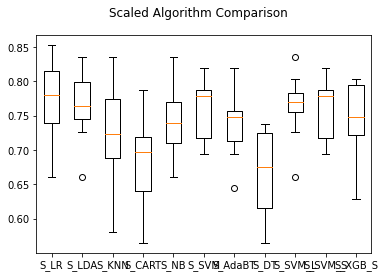

In [185]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [186]:
# Code added by Nikita
# MinMaxScalar the dataset
pipelines = []
pipelines.append(('MinMaxLR', Pipeline([('Scaler', MinMaxScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('MinMaxLDA', Pipeline([('Scaler', MinMaxScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('MinMaxKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('MinMaxCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('MinMaxNB', Pipeline([('Scaler', MinMaxScaler()),('NB', GaussianNB())])))
pipelines.append(('MinMaxSVM', Pipeline([('Scaler', MinMaxScaler()),('SVM', SVC(gamma='auto'))])))
pipelines.append(('MinMaxAdaBoost', Pipeline([('Scaler', MinMaxScaler()),('AdaBT', AdaBoostClassifier())])))
#code added by Nikita Starts
pipelines.append(('MinMaxDT', Pipeline([('Scaler', MinMaxScaler()),('DT',DecisionTreeClassifier(random_state=0))])))
pipelines.append(('MinMaxSVM_linear', Pipeline([('Scaler', MinMaxScaler()),('SVM_L',SVC(kernel="linear"))])))
pipelines.append(('MinMaxSVM_scale', Pipeline([('Scaler', MinMaxScaler()),('SVM_S', SVC(gamma='scale'))])))
pipelines.append(('MinMaxXGBoost_scale', Pipeline([('Scaler', MinMaxScaler()),('XGB', xgb.XGBClassifier(objective="binary:logistic", random_state=seed))])))
#Code added by Nikita ends
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


MinMaxLR: 0.770677 (0.047473)
MinMaxLDA: 0.765732 (0.048088)
MinMaxKNN: 0.723453 (0.065694)
MinMaxCART: 0.668086 (0.057173)
MinMaxNB: 0.739662 (0.048063)
MinMaxSVM: 0.736383 (0.032880)
MinMaxAdaBoost: 0.741248 (0.048427)
MinMaxDT: 0.668112 (0.061071)
MinMaxSVM_linear: 0.751163 (0.050248)
MinMaxSVM_scale: 0.759281 (0.042213)
MinMaxXGBoost_scale: 0.741433 (0.059245)


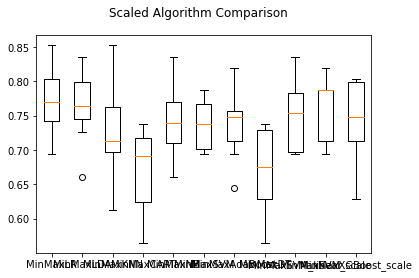

In [187]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [188]:
# Code added by Nikita
# Robust Scalar the dataset
pipelines = []
pipelines.append(('RobustLR', Pipeline([('Scaler', RobustScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('RobustLDA', Pipeline([('Scaler', RobustScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('RobustKNN', Pipeline([('Scaler', RobustScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('RobustCART', Pipeline([('Scaler', RobustScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('RobustNB', Pipeline([('Scaler', RobustScaler()),('NB', GaussianNB())])))
pipelines.append(('RobustSVM', Pipeline([('Scaler', RobustScaler()),('SVM', SVC(gamma='auto'))])))
pipelines.append(('RobustAdaBoost', Pipeline([('Scaler', RobustScaler()),('AdaBT', AdaBoostClassifier())])))
#code added by Nikita Starts
pipelines.append(('RobustDT', Pipeline([('Scaler', RobustScaler()),('DT',DecisionTreeClassifier(random_state=0))])))
pipelines.append(('RobustSVM_linear', Pipeline([('Scaler', RobustScaler()),('SVM_L',SVC(kernel="linear"))])))
pipelines.append(('RobustSVM_scale', Pipeline([('Scaler', RobustScaler()),('SVM_S', SVC(gamma='scale'))])))
pipelines.append(('RobustXGB_scale', Pipeline([('Scaler', RobustScaler()),('XGB', xgb.XGBClassifier(objective="binary:logistic", random_state=seed))])))
#Code added by Nikita ends
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RobustLR: 0.769064 (0.057590)
RobustLDA: 0.765732 (0.048088)
RobustKNN: 0.738075 (0.055090)
RobustCART: 0.666526 (0.074965)
RobustNB: 0.739662 (0.048063)
RobustSVM: 0.767398 (0.040698)
RobustAdaBoost: 0.741248 (0.048427)
RobustDT: 0.663194 (0.062512)
RobustSVM_linear: 0.764120 (0.045755)
RobustSVM_scale: 0.757589 (0.035563)
RobustXGB_scale: 0.741407 (0.057544)


In [189]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.760735 using {'n_neighbors': 29}
0.674484 (0.045008) with: {'n_neighbors': 1}
0.715151 (0.036003) with: {'n_neighbors': 3}
0.720254 (0.067639) with: {'n_neighbors': 5}
0.738181 (0.061830) with: {'n_neighbors': 7}
0.747964 (0.056910) with: {'n_neighbors': 9}
0.749551 (0.050655) with: {'n_neighbors': 11}
0.754389 (0.051621) with: {'n_neighbors': 13}
0.741327 (0.051271) with: {'n_neighbors': 15}
0.739635 (0.041676) with: {'n_neighbors': 17}
0.755896 (0.039301) with: {'n_neighbors': 19}
0.759122 (0.035107) with: {'n_neighbors': 21}
0.752644 (0.043487) with: {'n_neighbors': 23}
0.755923 (0.039850) with: {'n_neighbors': 25}
0.759149 (0.042542) with: {'n_neighbors': 27}
0.760735 (0.031475) with: {'n_neighbors': 29}
0.749392 (0.034291) with: {'n_neighbors': 31}
0.754336 (0.037023) with: {'n_neighbors': 33}
0.752723 (0.039899) with: {'n_neighbors': 35}
0.755949 (0.035307) with: {'n_neighbors': 37}
0.754389 (0.045667) with: {'n_neighbors': 39}


In [190]:
# Tune scaled KNN with MinMax
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.760894 using {'n_neighbors': 37}
0.677842 (0.056401) with: {'n_neighbors': 1}
0.723347 (0.054013) with: {'n_neighbors': 3}
0.736462 (0.064677) with: {'n_neighbors': 5}
0.746192 (0.038913) with: {'n_neighbors': 7}
0.736542 (0.051314) with: {'n_neighbors': 9}
0.744659 (0.052688) with: {'n_neighbors': 11}
0.754442 (0.052392) with: {'n_neighbors': 13}
0.746351 (0.060437) with: {'n_neighbors': 15}
0.751058 (0.037551) with: {'n_neighbors': 17}
0.755949 (0.040242) with: {'n_neighbors': 19}
0.754363 (0.041570) with: {'n_neighbors': 21}
0.754389 (0.047874) with: {'n_neighbors': 23}
0.752776 (0.045756) with: {'n_neighbors': 25}
0.760867 (0.041410) with: {'n_neighbors': 27}
0.757668 (0.046694) with: {'n_neighbors': 29}
0.746245 (0.046649) with: {'n_neighbors': 31}
0.752697 (0.039436) with: {'n_neighbors': 33}
0.755976 (0.042014) with: {'n_neighbors': 35}
0.760894 (0.044302) with: {'n_neighbors': 37}
0.759175 (0.033150) with: {'n_neighbors': 39}


In [191]:
# Tune scaled KNN with Robust Scalar
scaler = RobustScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=2, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.763696 using {'n_neighbors': 35}
0.672237 (0.069588) with: {'n_neighbors': 1}
0.701904 (0.049769) with: {'n_neighbors': 3}
0.732734 (0.050390) with: {'n_neighbors': 5}
0.735960 (0.055784) with: {'n_neighbors': 7}
0.727895 (0.035222) with: {'n_neighbors': 9}
0.745796 (0.038987) with: {'n_neighbors': 11}
0.744130 (0.045964) with: {'n_neighbors': 13}
0.749101 (0.046780) with: {'n_neighbors': 15}
0.755632 (0.045919) with: {'n_neighbors': 17}
0.757245 (0.046202) with: {'n_neighbors': 19}
0.753966 (0.048610) with: {'n_neighbors': 21}
0.758805 (0.044424) with: {'n_neighbors': 23}
0.758805 (0.038031) with: {'n_neighbors': 25}
0.758805 (0.038031) with: {'n_neighbors': 27}
0.752300 (0.046729) with: {'n_neighbors': 29}
0.757245 (0.046762) with: {'n_neighbors': 31}
0.755579 (0.047257) with: {'n_neighbors': 33}
0.763696 (0.051762) with: {'n_neighbors': 35}
0.757192 (0.042221) with: {'n_neighbors': 37}
0.758805 (0.043717) with: {'n_neighbors': 39}


In [192]:
# Tune scaled SVM with soft margin and gamma = auto
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.767398 using {'C': 0.5, 'kernel': 'rbf'}
0.765706 (0.038544) with: {'C': 0.1, 'kernel': 'linear'}
0.752671 (0.038249) with: {'C': 0.1, 'kernel': 'poly'}
0.755949 (0.038096) with: {'C': 0.1, 'kernel': 'rbf'}
0.751058 (0.039597) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.760867 (0.046201) with: {'C': 0.3, 'kernel': 'linear'}
0.749392 (0.037985) with: {'C': 0.3, 'kernel': 'poly'}
0.762507 (0.038099) with: {'C': 0.3, 'kernel': 'rbf'}
0.710312 (0.037975) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.764093 (0.046492) with: {'C': 0.5, 'kernel': 'linear'}
0.759175 (0.043569) with: {'C': 0.5, 'kernel': 'poly'}
0.767398 (0.037987) with: {'C': 0.5, 'kernel': 'rbf'}
0.714966 (0.040119) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.767345 (0.045802) with: {'C': 0.7, 'kernel': 'linear'}
0.755896 (0.040043) with: {'C': 0.7, 'kernel': 'poly'}
0.764146 (0.038754) with: {'C': 0.7, 'kernel': 'rbf'}
0.708567 (0.035885) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.765706 (0.044768) with: {'C': 0.9, 'kernel': 'linear'

In [193]:
#code added by nikita
# Tune scaled SVM with hard margin and gamma = scale
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [10,20,30,50,100,300,500]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='scale')
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.765706 using {'C': 10, 'kernel': 'linear'}
0.765706 (0.045972) with: {'C': 10, 'kernel': 'linear'}
0.731571 (0.049391) with: {'C': 10, 'kernel': 'poly'}
0.742940 (0.041236) with: {'C': 10, 'kernel': 'rbf'}
0.692226 (0.054243) with: {'C': 10, 'kernel': 'sigmoid'}
0.765706 (0.045972) with: {'C': 20, 'kernel': 'linear'}
0.728398 (0.059537) with: {'C': 20, 'kernel': 'poly'}
0.723427 (0.051956) with: {'C': 20, 'kernel': 'rbf'}
0.676097 (0.044910) with: {'C': 20, 'kernel': 'sigmoid'}
0.765706 (0.045972) with: {'C': 30, 'kernel': 'linear'}
0.725119 (0.051739) with: {'C': 30, 'kernel': 'poly'}
0.721893 (0.067674) with: {'C': 30, 'kernel': 'rbf'}
0.695399 (0.052637) with: {'C': 30, 'kernel': 'sigmoid'}
0.765706 (0.045972) with: {'C': 50, 'kernel': 'linear'}
0.725119 (0.059721) with: {'C': 50, 'kernel': 'poly'}
0.718588 (0.064092) with: {'C': 50, 'kernel': 'rbf'}
0.683977 (0.057684) with: {'C': 50, 'kernel': 'sigmoid'}
0.765706 (0.045972) with: {'C': 100, 'kernel': 'linear'}
0.720333 (0.

In [194]:
#code added by nikita
# Tune MinMaxScalar SVM with soft margin and gamma = scale
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='scale')
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.769038 using {'C': 1.3, 'kernel': 'linear'}
0.741274 (0.038571) with: {'C': 0.1, 'kernel': 'linear'}
0.765865 (0.051699) with: {'C': 0.1, 'kernel': 'poly'}
0.754363 (0.042090) with: {'C': 0.1, 'kernel': 'rbf'}
0.606002 (0.041434) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.741274 (0.038571) with: {'C': 0.3, 'kernel': 'linear'}
0.760894 (0.039916) with: {'C': 0.3, 'kernel': 'poly'}
0.756002 (0.044228) with: {'C': 0.3, 'kernel': 'rbf'}
0.482020 (0.034809) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.744553 (0.041501) with: {'C': 0.5, 'kernel': 'linear'}
0.757562 (0.034221) with: {'C': 0.5, 'kernel': 'poly'}
0.754416 (0.045442) with: {'C': 0.5, 'kernel': 'rbf'}
0.464093 (0.034433) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.747858 (0.046210) with: {'C': 0.7, 'kernel': 'linear'}
0.760841 (0.036063) with: {'C': 0.7, 'kernel': 'poly'}
0.757721 (0.050718) with: {'C': 0.7, 'kernel': 'rbf'}
0.457589 (0.035456) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.749524 (0.049856) with: {'C': 0.9, 'kernel': 'line

In [196]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

################
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('AdaBT', AdaBoostClassifier()))
##Changes Done By Nikita starts ###
models.append(('DT',DecisionTreeClassifier(random_state=0)))
models.append(('SVM_L',SVC(kernel="linear")))
models.append(('SVM_S', SVC(gamma='scale')))
models.append(('XGB', xgb.XGBClassifier(objective="binary:logistic", random_state=seed)))
results = []
names = []
##Changes Done By Nikita ends ###
##################
Fitted_models=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
# Fit the model on 80%
print("Training data results")
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, rescaledX, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    model.fit(rescaledX, y_train)
    Fitted_models.append((name,model))
    print(msg)
#model = LogisticRegression(solver='liblinear')
#model.fit(X_train, y_train)

print("----------------------------------------------------------------------------")
print("Finalized Models are :")
scaler = MinMaxScaler().fit(X_test)
rescaledX = scaler.transform(X_test)
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, rescaledX, y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(name)
    filename = 'finalized_model_pickle_%s.sav' % name
       #filename = path + filename
    dump(model, open(filename, 'wb'))
   
    

import time
time.sleep(5)
print("----------------------------------------------------------------------------")
print("Test data results")
scaler = MinMaxScaler().fit(X_test)
rescaledX = scaler.transform(X_test)
# load the model from disk
for name, model in models:
    filename = 'finalized_model_pickle_%s.sav' % name;
    loaded_model = load(open(filename, 'rb'))
    result = loaded_model.score(rescaledX, y_test)
    print(name, ":", result)

Training data results
LR: 0.770677 (0.047473)
LDA: 0.765732 (0.048088)
KNN: 0.736462 (0.064677)
CART: 0.674590 (0.065601)
NB: 0.739662 (0.048063)
SVM: 0.739662 (0.038846)
AdaBT: 0.741248 (0.048427)
DT: 0.668112 (0.061071)
SVM_L: 0.752803 (0.053173)
SVM_S: 0.757641 (0.040101)
XGB: 0.741433 (0.059245)
----------------------------------------------------------------------------
Finalized Models are :
LR
LDA
KNN
CART
NB
SVM
AdaBT
DT
SVM_L
SVM_S
XGB
----------------------------------------------------------------------------
Test data results
LR : 0.7792207792207793
LDA : 0.7922077922077922
KNN : 0.7727272727272727
CART : 0.6948051948051948
NB : 0.7987012987012987
SVM : 0.7727272727272727
AdaBT : 0.7857142857142857
DT : 0.7532467532467533
SVM_L : 0.7792207792207793
SVM_S : 0.7662337662337663
XGB : 0.7597402597402597


In [197]:
# Save Model Using joblib
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from joblib import dump
from joblib import load

################
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('AdaBT', AdaBoostClassifier()))
##Changes Done By Nikita starts ###
models.append(('DT',DecisionTreeClassifier(random_state=0)))
models.append(('SVM_L',SVC(kernel="linear")))
models.append(('SVM_S', SVC(gamma='scale')))
models.append(('XGB', xgb.XGBClassifier(objective="binary:logistic", random_state=seed)))
results = []
names = []
##Changes Done By Nikita ends ###
##################
Fitted_models=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
# Fit the model on 80%
print("Training data results")
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, rescaledX, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    model.fit(rescaledX, y_train)
    Fitted_models.append((name,model))
    print(msg)
#model = LogisticRegression(solver='liblinear')
#model.fit(X_train, y_train)
#print(Fitted_models)
print("----------------------------------------------------------------------------")
print("Finalized Models are :")
scaler = MinMaxScaler().fit(X_test)
rescaledX = scaler.transform(X_test)
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, rescaledX, y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(name)
    filename = 'finalized_model_joblib_%s.sav' % name
    dump(model, filename)
  
    
#print(Fitted_models)
import time
time.sleep(5)
print("----------------------------------------------------------------------------")
print("Test data results")
scaler = MinMaxScaler().fit(X_test)
rescaledX = scaler.transform(X_test)
# load the model from disk
for name, model in models:
    filename = 'finalized_model_joblib_%s.sav' % name;
    loaded_model = load(filename)
    result = loaded_model.score(rescaledX, y_test)
    print(name, ":", result)

Training data results
LR: 0.770677 (0.047473)
LDA: 0.765732 (0.048088)
KNN: 0.736462 (0.064677)
CART: 0.669778 (0.076809)
NB: 0.739662 (0.048063)
SVM: 0.739662 (0.038846)
AdaBT: 0.741248 (0.048427)
DT: 0.668112 (0.061071)
SVM_L: 0.752803 (0.053173)
SVM_S: 0.757641 (0.040101)
XGB: 0.741433 (0.059245)
----------------------------------------------------------------------------
Finalized Models are :
LR
LDA
KNN
CART
NB
SVM
AdaBT
DT
SVM_L
SVM_S
XGB
----------------------------------------------------------------------------
Test data results
LR : 0.7792207792207793
LDA : 0.7922077922077922
KNN : 0.7727272727272727
CART : 0.7467532467532467
NB : 0.7987012987012987
SVM : 0.7727272727272727
AdaBT : 0.7857142857142857
DT : 0.7532467532467533
SVM_L : 0.7792207792207793
SVM_S : 0.7662337662337663
XGB : 0.7597402597402597
